# Project Description – COVID-19 Image classification

## Data Description:

The project is inspired from a dataset from Kaggle.

Note: For project purposes, the dataset is modified according to the learning requirements. 
 
 You are provided with the following files:

 - testimage.npy

 - testLabels.csv

 - trainimage.npy

 - trainLabels.csv

The dataset (above 4 files) has to be downloaded from Olympus platform of Great Learning.

## Context:

- Can you differentiate an X-ray image of a normal person from an unhealthy one?
- The ability to do so effectively can mean better diagnosis.

## Objective:

- To implement the techniques learnt as a part of the course.

## Learning Outcomes:

- Pre-processing of image data.
- Visualization of images.
- Building CNN.
- Evaluate the Model.

In [8]:
SEED=1906

In [9]:
# Import necessary libraries.
import cv2
import math
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

In [10]:
IMAGE_PATH='/content/drive/MyDrive/Colab Notebooks/trainimage.npy'
LABELS_PATH='/content/drive/MyDrive/Colab Notebooks/trainLabels.csv'

In [11]:
# Load the image file of dataset
images = np.load(IMAGE_PATH)

# Load the labels file of dataset
labels = pd.read_csv(LABELS_PATH)

In [12]:
print(images.shape)
print(labels.shape)

(251, 128, 128, 3)
(251, 1)


In [13]:
labels['Label'].value_counts()

Covid              111
Viral Pneumonia     70
Normal              70
Name: Label, dtype: int64

In [14]:
labels['Label'].value_counts(normalize=True)

Covid              0.442231
Viral Pneumonia    0.278884
Normal             0.278884
Name: Label, dtype: float64

In [15]:
XRayType = labels['Label'].unique()
len(XRayType)

3

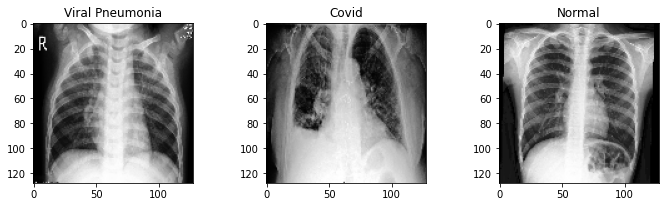

In [16]:
# Show some example images
plt.figure(figsize=(16,10))
for i, s in enumerate(XRayType):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[labels[labels['Label']==s].head(10).index[0]])
    plt.title(s)

## Apply image processing on the images:

- Gaussian Blurring.
- Normalization.
- Visualize data after pre-processing.

In [17]:
plt.figure(figsize=(16,10))

preprocessed_images = []       # Initialize empty list to store the images after pre-processing.

for img in images:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)
    preprocessed_images.append(blurImg)# Append image 
    
    # Show examples

<Figure size 1152x720 with 0 Axes>

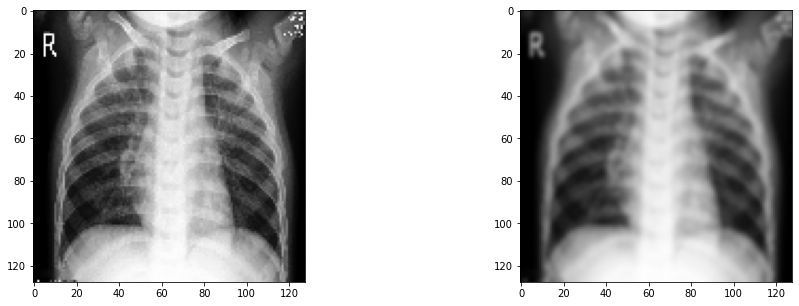

In [18]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1); plt.imshow(images[0])         # Show the original image
plt.subplot(1, 2, 2); plt.imshow(preprocessed_images[0])     # Blur image

In [19]:
preprocessed_images = np.asarray(preprocessed_images)    # Convert to numpy array.

In [20]:
len(preprocessed_images), len(images)

(251, 251)

In [21]:
preprocessed_images[0].shape, images[0].shape

((128, 128, 3), (128, 128, 3))

In [22]:
# Normalize image data.
preprocessed_images = preprocessed_images / 255

In [23]:
images = images / 255

# Make data compatible:

- Convert labels from digits to one hot vectors.
- Print the label for y_train[0].
- Check the shape of data, Reshape data into shapes compatible with Keras models, if already not compatible.

In [24]:
labels

,Label
0,Viral Pneumonia
1,Viral Pneumonia
2,Viral Pneumonia
3,Viral Pneumonia
4,Viral Pneumonia
...,...
246,Normal
247,Normal
248,Normal
249,Normal


In [25]:
# Convert labels from digits to one hot vectors.

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(labels)

In [26]:
y[0]

array([0, 0, 1])

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(preprocessed_images, y, test_size=0.3, random_state=SEED)
X_train_org, X_test_org, y_train, y_test = train_test_split(images, y, test_size=0.3, random_state=SEED)



In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(175, 128, 128, 3)
(175, 3)
(76, 128, 128, 3)
(76, 3)


In [29]:
# Reshape data into shapes compatible with Keras models.

X_train = X_train.reshape(X_train.shape[0], 128, 128, 3)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 3)
X_train_org = X_train.reshape(X_train_org.shape[0], 128, 128, 3)
X_test_org = X_test.reshape(X_test_org.shape[0], 128, 128, 3)

In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_train_org.shape)
print(X_test_org.shape)

(175, 128, 128, 3)
(175, 3)
(76, 128, 128, 3)
(76, 3)
(175, 128, 128, 3)
(76, 128, 128, 3)


# Building CNN:

- Define layers.
- Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy)

In [31]:
def architecture_1():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=(128, 128, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.GlobalMaxPooling2D())
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(12, activation="softmax"))
    
    return model

def architecture_2():
    model = models.Sequential()

    model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=(128, 128, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.GlobalMaxPooling2D())
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(12, activation="softmax"))

    
    return model

def architecture_3():
    model = models.Sequential()

    model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=(128, 128, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.GlobalMaxPooling2D())
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(12, activation="softmax"))

    return model


def architecture_4():
    model = models.Sequential()

    model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=(128, 128, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(128, (3, 3), padding='same', activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.GlobalMaxPooling2D())
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(12, activation="softmax"))

    return model




In [32]:
import tensorflow as tf

In [33]:
model = architecture_1()

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
global_max_pooling2d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 256)               8448      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                3

In [35]:
l = model.layers

In [36]:
l[0].trainable

True

In [37]:
l[0].name

'conv2d'

In [38]:
l[0].trainable = False

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
global_max_pooling2d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 256)               8448      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                3

## Model Architecture

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
global_max_pooling2d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 256)               8448      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                3

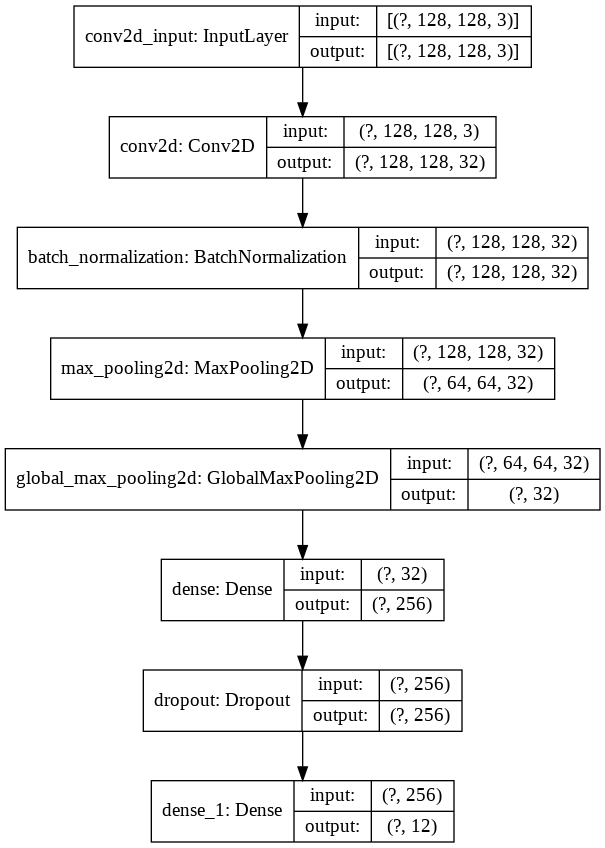

In [41]:
tf.keras.utils.plot_model(
    model, to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
)

In [42]:
# Set the optimizer and loss function, and compile the model with them.

model = architecture_1()

optimizer = tf.keras.optimizers.Adam(
                  learning_rate=0.001,
                  beta_1=0.9,
                  beta_2=0.999,
                  epsilon=1e-07,
                  amsgrad=False,
                  name='Adam')
loss = tf.keras.losses.CategoricalCrossentropy()

model.compile(optimizer = optimizer, loss=loss, metrics=["accuracy"])


In [43]:
!mkdir ./architecture_1

In [45]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_path = "./architecture_1/cp-{epoch:04d}_loss{val_loss:.4f}.ckpt"

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint(checkpoint_path,
                                   monitor='val_loss',
                                   verbose=1,
                                   save_best_only=False,
                                   save_weights_only=False,
                                   mode='auto',
                                   period=1)

In [46]:
###### Set epochs = 40, and fit the model.

history = model.fit(X_train,
                    y_train,
                    epochs = 40,
                    validation_data = (X_test,y_test),
                    batch_size = 32,
                    shuffle=True,
                    callbacks=[early_stopping,model_checkpoint])

Epoch 1/40


ValueError: ignored

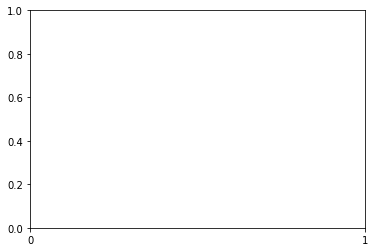

In [47]:
positions = range(2)
labels = range(2)
plt.xticks(positions, labels)
plt.show()

In [48]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs


plt.plot  ( epochs,     acc ,label='training')
plt.plot  ( epochs, val_acc,label='validation' )
plt.title ('Training and validation accuracy')
plt.xticks(epochs, epochs)
plt.legend()
plt.figure()


plt.plot  ( epochs,     loss , label='training')
plt.plot  ( epochs, val_loss , label='validation')
plt.title ('Training and validation loss'   )
plt.xticks(epochs, epochs)
plt.legend()
plt.show()

NameError: ignored